In [1]:
import tensorflow as tf
from PIL import Image
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt


In [15]:
IMG_PATH = ".\\Images_and_Data"
img_name = "Bundle_01\\mixed_09.png"

BUCKET_SIZE = 60
img = cv2.imread(f"{IMG_PATH}\\{img_name}", cv2.IMREAD_GRAYSCALE)
size_y = img.shape[0]
size_x = img.shape[1]
steps_horizontal = int(size_x/BUCKET_SIZE)
steps_vertikal = int(size_y/BUCKET_SIZE)

plt.rcParams["figure.figsize"] = (15, 10)


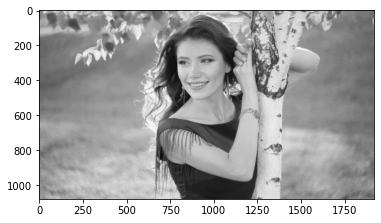

In [3]:
plt.imshow(img, cmap="gray")

In [4]:
model = tf.keras.models.load_model("D:\\Main\\MA_PROGR\\Code\\models\\single_grayscale_image_big_dataset")

In [5]:
alias_values = np.full((steps_vertikal, steps_horizontal), 0).tolist()


In [6]:
def create_alias_values(img):
    for y in range(int(steps_vertikal)):
        for x in range(int(steps_horizontal)):
            bucket = img[y*BUCKET_SIZE:(y+1)*BUCKET_SIZE, x *
                         BUCKET_SIZE:(x+1)*BUCKET_SIZE] / 255
            # buckets[y][x]=bucket
            # print(bucket.shape)
            tmp_res = model.predict(bucket.reshape(
                1, BUCKET_SIZE, BUCKET_SIZE, 1))
            alias_values[y][x] = 1 - float(tmp_res)
    return alias_values

singleGrayScaleModel_result = create_alias_values(img)


In [7]:

# np.array(singleGrayScaleModel_result).shape

In [8]:
# print(singleGrayScaleModel_result)


[[0.5085304975509644, 0.9456507861614227, 0.09254413843154907, 0.0016892552375793457, 0.5174063146114349, 0.03095722198486328, 0.0005701184272766113, 0.9905315339565277, 0.842654675245285, 0.8741074502468109, 0.9281084835529327, 0.9981072545051575, 0.2361353039741516, 0.0018433928489685059, 0.005727231502532959, 0.0018753409385681152, 0.008317708969116211, 0.04752373695373535, 0.014722883701324463, 0.8785442113876343, 0.8518439531326294, 0.18366873264312744, 0.0859677791595459, 0.0029677748680114746, 0.06528651714324951, 0.010383546352386475, 0.012587428092956543, 0.26385021209716797, 0.5126865208148956, 0.9768384099006653, 0.9816389679908752, 0.9730778932571411], [0.8481914103031158, 0.9222397804260254, 0.981719046831131, 0.9912851452827454, 0.508167177438736, 0.9882974624633789, 0.5696002840995789, 0.9917784333229065, 0.002039313316345215, 0.02920377254486084, 0.8958377540111542, 0.929724246263504, 0.19650614261627197, 0.9959861040115356, 0.8894774615764618, 0.9963914752006531, 0.996

In [9]:
np.save(f"{IMG_PATH}\\{img_name.split('.')[0]}_single_grayscale_cnn_matrix", singleGrayScaleModel_result)


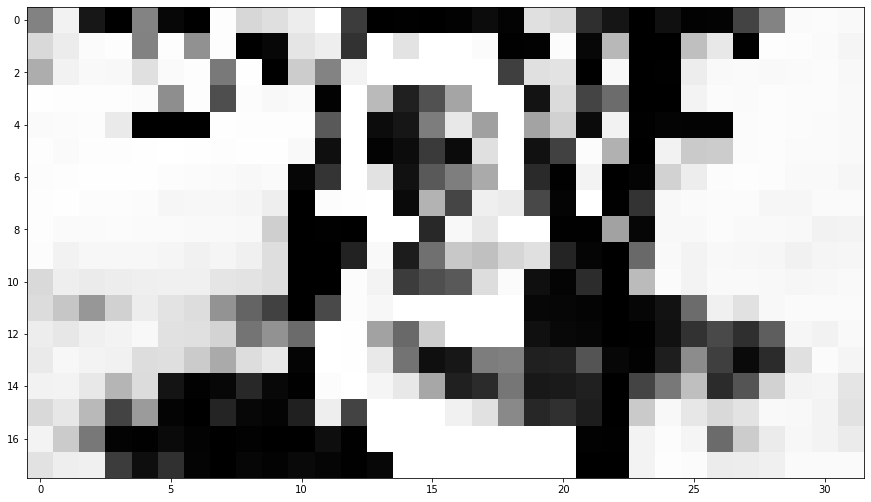

In [16]:
plt.imshow(singleGrayScaleModel_result, cmap="gray")
plt.show()
